In [2]:
import torch
import pickle
from pykan.kan import KAN
from src.preprocessing import load_and_preprocess_mimic
from src.train_kan import train_kan_model

# Load and preprocess data
data_dict = load_and_preprocess_mimic(path="data/MIMIC-IV.dta")

# Save preprocessing objects
with open("models/scaler_cont.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_cont"], f)

with open("models/scaler_ord.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_ord"], f)

with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(data_dict["label_encoders"], f)

with open("models/original_df.pkl", "wb") as f:
    pickle.dump(data_dict["original_data"], f)

# Save feature info
feature_config = {
    "continuous_labels": data_dict["continuous_labels"],
    "binary_labels": data_dict["binary_labels"],
    "ordinal_labels": data_dict["ordinal_labels"], 
    "original_continuous_indices": data_dict["original_continuous_indices"],
    "original_ordinal_indices": data_dict["original_ordinal_indices"],
    "original_binary_indices": data_dict["original_binary_indices"]
}

with open("models/feature_config.pkl", "wb") as f:
    pickle.dump(feature_config, f)

# Train the KAN model
results = train_kan_model(
    dataset=dict(list(data_dict.items())[:4]),
    original_data=data_dict['original_data'],
    num_epochs=10,
    with_graphs=True
)

model = results["model"]

torch.save({'model_state_dict': model.state_dict(), 
            'feature_scores': model.feature_score,
            'model_spline_preacts': model.spline_preacts,
            'model_spline_postacts': model.spline_postacts}, 
            'model_with_scores.pt')

# Print metrics
print(results["metrics"])

	checkpoint directory created: ./model
	saving model version 0.0
experiment: PyKAN | dataset=SAD | KAN shape=[[53, 0], [1, 0], [2, 0]]


| train_loss: 7.31e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  30%|▎| 3/10 [00:17<00:39,  5.69s/i


KeyboardInterrupt: 

In [3]:
# Save preprocessing objects
with open("models/scaler_cont.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_cont"], f)

with open("models/scaler_ord.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_ord"], f)

with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(data_dict["label_encoders"], f)

with open("models/original_df.pkl", "wb") as f:
    pickle.dump(data_dict["original_data"], f)

# Save feature info
feature_config = {
    "continuous_labels": data_dict["continuous_labels"],
    "binary_labels": data_dict["binary_labels"],
    "ordinal_labels": data_dict["ordinal_labels"], 
    "original_continuous_indices": data_dict["original_continuous_indices"],
    "original_ordinal_indices": data_dict["original_ordinal_indices"],
    "original_binary_indices": data_dict["original_binary_indices"]
}

In [6]:
with open("models/feature_config.pkl", "rb") as f:
    feature_config = pickle.load(f)

# Get the feature groups
continuous_labels = feature_config["continuous_labels"]
binary_labels = feature_config["binary_labels"]
ordinal_labels = feature_config["ordinal_labels"]

# Concatenate the full feature list
feature_names = continuous_labels + binary_labels + ordinal_labels

# Compute index ranges
continuous_indices = list(range(len(continuous_labels)))
binary_indices = list(range(len(continuous_labels), len(continuous_labels) + len(binary_labels)))
ordinal_indices = list(range(len(continuous_labels) + len(binary_labels), len(feature_names)))

# Output the indices
print("Continuous indices:", continuous_indices)
print("Binary indices:", binary_indices)
print("Ordinal indices:", ordinal_indices)


Continuous indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Binary indices: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Ordinal indices: [51, 52]


In [4]:
model = KAN(
    width=[53, 1, 2], grid=5, k=3,
    seed=42, device=None
)

	checkpoint directory created: ./model
	saving model version 0.0


In [12]:
checkpoint = torch.load('model_with_scores.pt')

In [13]:
model.load_state_dict(checkpoint['model_state_dict'])
model.feature_scores = checkpoint['feature_scores']

In [14]:
model.feature_scores

tensor([0.0902, 0.0462, 0.1894, 0.0755, 0.0787, 0.0360, 0.0548, 0.0676, 0.0449,
        0.0764, 0.0398, 0.0955, 0.1352, 0.1304, 0.0485, 0.1787, 0.0814, 0.0434,
        0.0622, 0.0564, 0.0526, 0.9952, 1.0264, 0.0519, 0.0890, 0.0963, 0.0312,
        0.5827, 0.0403, 0.1179, 0.1626, 0.0295, 0.0264, 0.0352, 0.0265, 0.0132,
        0.1396, 0.1900, 0.0399, 0.0165, 0.0123, 0.0337, 0.0134, 0.0931, 0.0414,
        0.1557, 0.1010, 0.0438, 0.1164, 0.0330, 0.0270, 0.2912, 0.0898],
       requires_grad=True)

In [15]:
model.act_fun[0].grid.detach()

tensor([[-0.5788, -0.3859, -0.1929,  0.0000,  0.4189,  0.5381,  0.6342,  0.7418,
          0.9647,  1.1576,  1.3506,  1.5435],
        [-0.5383, -0.3523, -0.1663,  0.0198,  0.1632,  0.2072,  0.2497,  0.3061,
          0.9500,  1.1360,  1.3221,  1.5081],
        [-0.6000, -0.4000, -0.2000,  0.0000,  0.5173,  0.5396,  0.5669,  0.5983,
          1.0000,  1.2000,  1.4000,  1.6000],
        [-0.5901, -0.3914, -0.1926,  0.0062,  0.2884,  0.3529,  0.4174,  0.5121,
          1.0000,  1.1988,  1.3975,  1.5963],
        [-0.6000, -0.4000, -0.2000,  0.0000,  0.2218,  0.2911,  0.3387,  0.4298,
          1.0000,  1.2000,  1.4000,  1.6000],
        [-0.5680, -0.3720, -0.1760,  0.0200,  0.8863,  0.9294,  0.9726,  0.9961,
          1.0000,  1.1960,  1.3920,  1.5880],
        [-0.6000, -0.4000, -0.2000,  0.0000,  0.3080,  0.3748,  0.4417,  0.5296,
          1.0000,  1.2000,  1.4000,  1.6000],
        [-0.5907, -0.3919, -0.1930,  0.0058,  0.1864,  0.2360,  0.2912,  0.3579,
          1.0000,  1.1988,  1.

In [ ]:
, layer.coef.detach(), layer.scale_base.detach(), layer.scale_sp.detach()

In [7]:
x = torch.tensor([0.4941, 0.1310, 0.5806, 0.6543, 0.4667, 0.7600, 0.1872, 0.1105, 0.1205,
        0.1879, 0.4000, 0.2505, 0.0385, 0.0101, 0.1212, 0.5000, 0.4146, 0.2192,
        0.2308, 0.4692, 0.1370, 0.0220, 0.0287, 0.0802, 0.5870, 0.2391, 1.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0667])

len(x)

53

In [11]:
x = x.to('cpu')  # If you're using GPU
if x.dim() == 1:
    x = x.unsqueeze(0)
output = model(x)


c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  output_range_spline = torch.std(postacts_numerical, dim=0) # for training, only penalize

In [27]:
model = KAN(width=[53, 1, 2], grid=5, k=3, seed=42)
model.load_state_dict(torch.load("kan_model.pt", map_location=torch.device("cpu")))

	checkpoint directory created: ./model
	saving model version 0.0


<All keys matched successfully>

In [ ]:
model = KAN(width=[53, 1, 2], grid=5, k=3, seed=42)
model.load_state_dict(torch.load("kan_model.pt", map_location=torch.device("cpu")))

tensor([0.0902, 0.0462, 0.1894, 0.0755, 0.0787, 0.0360, 0.0548, 0.0676, 0.0449,
        0.0764, 0.0398, 0.0955, 0.1352, 0.1304, 0.0485, 0.1787, 0.0814, 0.0434,
        0.0622, 0.0564, 0.0526, 0.9952, 1.0264, 0.0519, 0.0890, 0.0963, 0.0312,
        0.5827, 0.0403, 0.1179, 0.1626, 0.0295, 0.0264, 0.0352, 0.0265, 0.0132,
        0.1396, 0.1900, 0.0399, 0.0165, 0.0123, 0.0337, 0.0134, 0.0931, 0.0414,
        0.1557, 0.1010, 0.0438, 0.1164, 0.0330, 0.0270, 0.2912, 0.0898],
       grad_fn=<MeanBackward1>)

In [ ]:
print(model.spline_postacts)

[tensor([[[-0.0629, -0.0455, -0.0385,  0.1903, -0.0018, -0.0147, -0.0904,
           0.0055, -0.0388,  0.1079, -0.0318, -0.0619, -0.0583,  0.1065,
           0.0983, -0.0936,  0.2070, -0.0209,  0.0093, -0.0319, -0.0169,
          -0.0191,  0.3757,  0.5250, -0.0185, -0.0958,  0.2685,  0.1753,
           0.0790, -0.0792, -0.0865,  0.0113,  0.0056,  0.0659,  0.0395,
           0.0134, -0.1009,  0.1096, -0.0174, -0.0163, -0.0080,  0.0766,
          -0.0076,  0.0222, -0.0512, -0.0377,  0.0697,  0.0115,  0.1281,
          -0.0320, -0.0081,  0.1434,  0.1623]]]), tensor([[[ 2.9666],
         [-1.6010]]])]


In [2]:
import os
images_list = [f for f in os.listdir('images') if f.lower().endswith('.png')]

In [1]:
with open("models/feature_config.pkl", "rb") as f:
    feature_config = pickle.load(f)    

feature_names = feature_config["continuous_labels"] + feature_config["binary_labels"] + feature_config["ordinal_labels"]

NameError: name 'pickle' is not defined

In [7]:
import dash
from dash import dcc, html, Output, Input
import plotly.express as px
import pandas as pd
import pickle
from pykan.kan import KAN
import torch
import os

# Load data artifacts
with open("models/feature_config.pkl", "rb") as f:
    feature_config = pickle.load(f)
with open("models/original_df.pkl", "rb") as f:
    original_df = pickle.load(f)

feature_names = feature_config["continuous_labels"] + feature_config["binary_labels"] + feature_config["ordinal_labels"]

# Load model
model = KAN(width=[53, 1, 2], grid=5, k=3, seed=42)
checkpoint = torch.load('model_with_scores.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.feature_scores = checkpoint['feature_scores']
model.eval()

images_list = [f for f in os.listdir('images') if f.lower().endswith('.png')]

# Feature Importance Dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': model.feature_scores.tolist(),
    'Image': images_list
})

# Create figure
fig = px.bar(
    importance_df.sort_values(by="Score", ascending=False),
    x='Score',
    y='Feature',
    orientation='h',
    title='Belangrijkheiden (Hoog naar laag)',
    labels={'Score': 'Belangrijkheid Score'}
)
fig.update_layout(clickmode='event+select', yaxis={'categoryorder': 'total ascending'})

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='importance-bar', figure=fig),
    html.Img(id='feature-image', style={'width': '50%', 'marginTop': '20px'})
])

# Callback to update image
@app.callback(
    Output('feature-image', 'src'),
    Input('importance-bar', 'clickData')
)
def update_image(clickData):
    if clickData:
        feature = clickData['points'][0]['y']
        image_file = importance_df.loc[importance_df['Feature'] == feature, 'Image'].values[0]
        return f"/images/{image_file}"
    return None

	checkpoint directory created: ./model
	saving model version 0.0


In [8]:
importance_df

,Feature,Score,Image
0,Age,0.090228,layer0_input0_to_output0.png
1,Weight (Kg),0.046227,layer0_input10_to_output0.png
2,Temperature (Celcius),0.189441,layer0_input11_to_output0.png
3,Heart Rate (Beats per Minute),0.075549,layer0_input12_to_output0.png
4,Respiratory Rate,0.078746,layer0_input13_to_output0.png
5,spo2,0.036048,layer0_input14_to_output0.png
6,Systolic BP (mmHG),0.054784,layer0_input15_to_output0.png
7,Diastolic BP (mmHG),0.067646,layer0_input16_to_output0.png
8,Mean arterial BP (mmHG),0.044860,layer0_input17_to_output0.png
9,WBC (K/uL),0.076371,layer0_input18_to_output0.png


In [9]:
images_list

['layer0_input0_to_output0.png',
 'layer0_input10_to_output0.png',
 'layer0_input11_to_output0.png',
 'layer0_input12_to_output0.png',
 'layer0_input13_to_output0.png',
 'layer0_input14_to_output0.png',
 'layer0_input15_to_output0.png',
 'layer0_input16_to_output0.png',
 'layer0_input17_to_output0.png',
 'layer0_input18_to_output0.png',
 'layer0_input19_to_output0.png',
 'layer0_input1_to_output0.png',
 'layer0_input20_to_output0.png',
 'layer0_input21_to_output0.png',
 'layer0_input22_to_output0.png',
 'layer0_input23_to_output0.png',
 'layer0_input24_to_output0.png',
 'layer0_input25_to_output0.png',
 'layer0_input26_to_output0.png',
 'layer0_input27_to_output0.png',
 'layer0_input28_to_output0.png',
 'layer0_input29_to_output0.png',
 'layer0_input2_to_output0.png',
 'layer0_input30_to_output0.png',
 'layer0_input31_to_output0.png',
 'layer0_input32_to_output0.png',
 'layer0_input33_to_output0.png',
 'layer0_input34_to_output0.png',
 'layer0_input35_to_output0.png',
 'layer0_input36_

In [3]:
# Load model
model = KAN(width=[53, 1, 2], grid=5, k=3, seed=42)
checkpoint = torch.load('model_with_scores.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.feature_scores = checkpoint['feature_scores']
model.eval()


	checkpoint directory created: ./model
	saving model version 0.0


MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

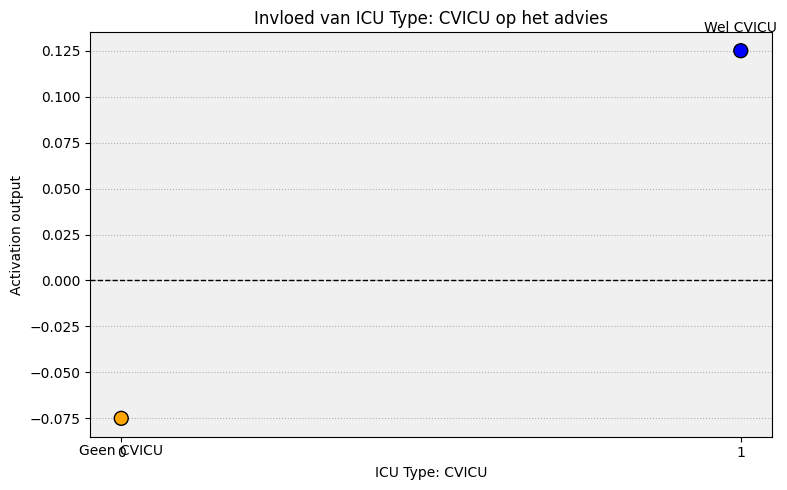

In [1]:
import matplotlib.pyplot as plt

x = [0, 1]
y = [-0.075, 0.125]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color=['orange', 'blue'], edgecolors='black', s=100, zorder=3)

# Duidelijke horizontale nul-lijn
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Titels en labels
plt.title("Invloed van ICU Type: CVICU op het advies")
plt.xlabel("ICU Type: CVICU")
plt.ylabel("Activation output")

# Optioneel: Annotaties bij de punten
plt.text(0, y[0] - 0.02, 'Geen CVICU', ha='center')
plt.text(1, y[1] + 0.01, 'Wel CVICU', ha='center')

# Achtergrond opmaken
plt.grid(True, axis='y', linestyle=':', zorder=0)
plt.gca().set_facecolor("#f0f0f0")

plt.xticks([0, 1])
plt.tight_layout()
plt.show()
